In [1]:
# Load all libraries
import rasterio
import numpy as np
import pandas as pd
import os
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create the column names of dataframe from indices' names
colNames = []
folder = 'masked_CC'
i = 0
for subfolder in os.listdir(folder):
    for filename in os.listdir(os.path.join(folder, subfolder)):
        img_name = filename.split('_')[1]
        colNames.append(img_name)
    i += 1
    if i > 0:
        break

In [3]:
colNames

['blue',
 'dbsi',
 'evi',
 'gi',
 'gndvi',
 'green',
 'kndvi',
 'ndci',
 'ndpi',
 'ndvigb',
 'ndvi',
 'nir',
 'npci',
 'psri',
 'red',
 'rvi1',
 'rvi2',
 'sipi',
 'srpi',
 'tvi',
 'vari',
 'VH',
 'VV-VH',
 'VV']

In [4]:
colNames.append('class')

In [5]:
colNames

['blue',
 'dbsi',
 'evi',
 'gi',
 'gndvi',
 'green',
 'kndvi',
 'ndci',
 'ndpi',
 'ndvigb',
 'ndvi',
 'nir',
 'npci',
 'psri',
 'red',
 'rvi1',
 'rvi2',
 'sipi',
 'srpi',
 'tvi',
 'vari',
 'VH',
 'VV-VH',
 'VV',
 'class']

In [6]:
df = pd.DataFrame(columns = colNames)

In [7]:
df

,blue,dbsi,evi,gi,gndvi,green,kndvi,ndci,ndpi,ndvigb,...,rvi1,rvi2,sipi,srpi,tvi,vari,VH,VV-VH,VV,class


In [8]:
# Get the values of images in one dataframe, excluding from it zero class
for subfolder in os.listdir(folder):
    x = len([name for name in os.listdir(os.path.join(folder, subfolder)) if os.path.isfile(os.path.join(folder, subfolder, name))])
    i = 0
    array = {}
    for filename in os.listdir(os.path.join(folder, subfolder)):
        if i < x:
            img = rasterio.open(os.path.join(folder, subfolder, filename))
            array[f'var{i}'] = img.read()
            i += 1
    imgy =  rasterio.open('images/CC_2023/vector_2023.tif')
    array[f'var{i+1}'] = imgy.read()
    arra = np.concatenate(list(array.values()),0)
    df_img = pd.DataFrame(arra.reshape([x+1,-1]).T, columns=colNames)
    df_filtered = df_img[df_img['class'] > 0]
    df = pd.concat([df, df_filtered])

In [22]:
df.head()

,blue,dbsi,evi,gi,gndvi,green,kndvi,ndci,ndpi,ndvigb,...,rvi1,rvi2,sipi,srpi,tvi,vari,VH,VV-VH,VV,class
1328,187.0,-0.360341,1.699176,1.343949,0.652102,422.0,0.486567,0.407547,0.368736,0.385878,...,6.382166,4.748815,0.829302,0.595541,105720.0,0.196721,0.009269,10.602147,0.098267,2.0
1329,215.0,-0.352234,1.978818,1.434343,0.658927,426.0,0.509010,0.420488,0.397028,0.329173,...,6.976431,4.863850,0.811981,0.723906,111660.0,0.253937,0.006035,8.921235,0.053838,2.0
1330,150.0,-0.369787,1.790232,1.471014,0.701471,406.0,0.550549,0.450199,0.417085,0.460432,...,8.384058,5.699507,0.878247,0.543478,127480.0,0.244361,0.011688,3.941949,0.046072,2.0
1331,134.0,-0.300559,1.926244,1.527426,0.741244,362.0,0.589427,0.446908,0.522112,0.459677,...,10.278481,6.729282,0.895720,0.565401,136940.0,0.268817,0.014747,5.431677,0.080100,2.0
1332,139.0,-0.329117,2.054994,1.659193,0.752674,370.0,0.611331,0.470937,0.514117,0.453831,...,11.757848,7.086486,0.899312,0.623318,149820.0,0.323789,0.015965,5.754610,0.091873,2.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373624 entries, 1328 to 12691959
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   blue    373624 non-null  float64
 1   dbsi    373624 non-null  float64
 2   evi     373624 non-null  float64
 3   gi      373624 non-null  float64
 4   gndvi   373624 non-null  float64
 5   green   373624 non-null  float64
 6   kndvi   373624 non-null  float64
 7   ndci    373624 non-null  float64
 8   ndpi    373624 non-null  float64
 9   ndvigb  373624 non-null  float64
 10  ndvi    373624 non-null  float64
 11  nir     373624 non-null  float64
 12  npci    373624 non-null  float64
 13  psri    373624 non-null  float64
 14  red     373624 non-null  float64
 15  rvi1    373624 non-null  float64
 16  rvi2    373624 non-null  float64
 17  sipi    373624 non-null  float64
 18  srpi    373624 non-null  float64
 19  tvi     373624 non-null  float64
 20  vari    373624 non-null  float64
 21  VH   

In [24]:
df.describe()

,blue,dbsi,evi,gi,gndvi,green,kndvi,ndci,ndpi,ndvigb,...,rvi1,rvi2,sipi,srpi,tvi,vari,VH,VV-VH,VV,class
count,373624.000000,373624.000000,373624.000000,373624.000000,373624.000000,373624.000000,373624.000000,373624.000000,373624.000000,373624.000000,...,373624.000000,373624.000000,373624.000000,373624.000000,373624.000000,373624.000000,373624.000000,373624.000000,373624.000000,373624.000000
mean,383.012108,-0.247624,1.855023,1.388786,0.631860,653.122749,0.448365,0.350517,0.437672,0.288717,...,8.301150,5.380053,0.765744,0.750706,156563.706293,0.205721,0.020839,8.131402,0.114432,1.634258
std,204.078670,0.133928,4.353043,0.419624,0.145304,228.183729,0.181182,0.140395,0.137232,0.123104,...,6.719706,2.716593,0.127082,0.194672,61032.490637,0.191018,0.014182,16.316112,0.096464,0.481638
min,1.000000,-0.881061,-1561.666667,0.071563,-0.074931,38.000000,0.000000,-0.283364,-0.691574,-0.744108,...,0.666248,0.860585,0.085880,0.007299,-27960.000000,-1.954023,0.000014,0.092521,0.000973,1.000000
25%,247.000000,-0.334216,1.469871,1.107692,0.546649,494.000000,0.330932,0.258902,0.366833,0.207430,...,3.835687,3.411592,0.698935,0.603133,115180.000000,0.075515,0.010681,3.208276,0.059507,1.000000
50%,351.000000,-0.279949,1.984782,1.314869,0.654239,619.500000,0.485070,0.347994,0.454809,0.254400,...,6.345679,4.784344,0.790016,0.734828,163080.000000,0.202469,0.017541,5.341186,0.095606,2.000000
75%,481.000000,-0.192233,2.341211,1.601852,0.741152,781.000000,0.598199,0.447279,0.530317,0.342725,...,10.824926,6.726539,0.860963,0.866667,201440.000000,0.341031,0.027436,9.185428,0.146852,2.000000
max,5776.000000,0.492399,691.428571,26.600000,0.974565,5596.000000,0.757573,0.974684,0.952736,0.993671,...,418.800000,77.631579,0.999573,2.540000,400560.000000,1.257143,0.171081,4986.297363,18.766241,2.000000


In [12]:
df['class'].value_counts()

2.0    336540
1.0    203340
Name: class, dtype: int64

In [13]:
# Check for infinity values
np.isinf(df).values.sum() 

4

In [14]:
# Check at which column the infinity values are
df.columns.to_series()[np.isinf(df).any()]

gi        gi
psri    psri
rvi1    rvi1
rvi2    rvi2
dtype: object

In [15]:
# Replacing infinite with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [16]:
df.isnull().sum()

blue      0
dbsi      0
evi       0
gi        1
gndvi     0
green     0
kndvi     0
ndci      0
ndpi      0
ndvigb    0
ndvi      0
nir       0
npci      1
psri      1
red       0
rvi1      1
rvi2      1
sipi      0
srpi      1
tvi       0
vari      0
VH        0
VV-VH     0
VV        0
class     0
dtype: int64

In [17]:
df.drop(df[df['VV'] <= -99999].index, inplace=True)

In [18]:
df.drop(df[df['blue'] == 0].index, inplace=True)

In [19]:
df.drop(df[df['blue'] > 10000].index, inplace=True)

In [20]:
df.dropna(inplace=True)

In [21]:
df['class'].value_counts()

2.0    236974
1.0    136650
Name: class, dtype: int64

In [25]:
# Save the dataframe in csv file
df.to_csv('CC_2023_JJ.csv', index=False)

In [13]:
#df = pd.read_csv('CC_data.csv')

Class=2.0, n=1155744 (50.0)
Class=1.0, n=1155744 (50.0)


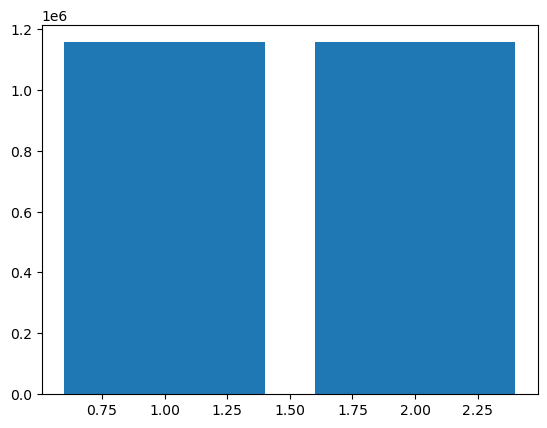

In [21]:
# Balance between the classes by using SMOTE
oversample = SMOTE()
data = df.values
X, y = data[:, :-1], data[:, -1]
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
for k, v in counter.items():
    per = v / len(y) * 100
    print('Class={}, n={} ({})'.format(k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

In [22]:
X.dtype

dtype('float64')

In [23]:
X.shape

(2311488, 24)

In [24]:
# Combine X and y in one array
arrayz = np.column_stack((X, y))

In [25]:
arrayz

array([[ 4.20000000e+02, -1.82014792e-01,  1.61864851e+00, ...,
         8.96960354e+00,  1.12368703e-01,  2.00000000e+00],
       [ 3.43000000e+02, -1.13368410e-01,  1.26832298e+00, ...,
         8.67384720e+00,  8.44534263e-02,  2.00000000e+00],
       [ 3.41000000e+02, -2.50544921e-01,  1.33995638e+00, ...,
         9.20981407e+00,  8.21796879e-02,  2.00000000e+00],
       ...,
       [ 3.49509919e+02, -2.59123460e-01,  1.89084137e+00, ...,
         5.49078648e+00,  1.31357638e-01,  1.00000000e+00],
       [ 7.57186108e+02,  6.88008182e-02,  3.19068402e-01, ...,
         1.34232560e+01,  6.57399760e-02,  1.00000000e+00],
       [ 3.12932331e+02, -3.08809393e-01,  2.55131854e+00, ...,
         3.80111520e+00,  5.25948228e-02,  1.00000000e+00]])

In [26]:
df = pd.DataFrame(arrayz, columns=colNames)

In [27]:
df.head()

,blue,dbsi,evi,gi,gndvi,green,kndvi,ndci,ndpi,ndvigb,...,rvi1,rvi2,sipi,srpi,tvi,vari,VH,VV-VH,VV,class
0,420.0,-0.182015,1.618649,1.097070,0.496850,599.0,0.274648,0.258152,0.348913,0.175662,...,3.263736,2.974958,0.618529,0.769231,10744.0,0.073103,0.012528,8.969604,0.112369,2.0
1,343.0,-0.113368,1.268323,1.076621,0.472570,548.0,0.245611,0.290592,0.387367,0.230079,...,3.005894,2.791971,0.633743,0.673870,62820.0,0.054622,0.009737,8.673847,0.084453,2.0
2,341.0,-0.250545,1.339956,1.171315,0.464481,588.0,0.268044,0.257945,0.273626,0.265877,...,3.203187,2.734694,0.650077,0.679283,4264.0,0.114820,0.008923,9.209814,0.082180,2.0
3,336.0,-0.315290,1.837561,1.297674,0.525106,558.0,0.358986,0.328649,0.297671,0.248322,...,4.167442,3.211470,0.684211,0.781395,21304.0,0.196319,0.005892,16.092522,0.094815,2.0
4,329.0,-0.254732,2.047013,1.357143,0.511478,532.0,0.361496,0.367742,0.360577,0.235772,...,4.198980,3.093985,0.666835,0.839286,15304.0,0.235294,0.010234,12.326612,0.126151,2.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2311488 entries, 0 to 2311487
Data columns (total 25 columns):
 #   Column  Dtype  
---  ------  -----  
 0   blue    float64
 1   dbsi    float64
 2   evi     float64
 3   gi      float64
 4   gndvi   float64
 5   green   float64
 6   kndvi   float64
 7   ndci    float64
 8   ndpi    float64
 9   ndvigb  float64
 10  ndvi    float64
 11  nir     float64
 12  npci    float64
 13  psri    float64
 14  red     float64
 15  rvi1    float64
 16  rvi2    float64
 17  sipi    float64
 18  srpi    float64
 19  tvi     float64
 20  vari    float64
 21  VH      float64
 22  VV-VH   float64
 23  VV      float64
 24  class   float64
dtypes: float64(25)
memory usage: 440.9 MB


In [29]:
df.describe()

,blue,dbsi,evi,gi,gndvi,green,kndvi,ndci,ndpi,ndvigb,...,rvi1,rvi2,sipi,srpi,tvi,vari,VH,VV-VH,VV,class
count,2.311488e+06,2.311488e+06,2.311488e+06,2.311488e+06,2.311488e+06,2.311488e+06,2.311488e+06,2.311488e+06,2.311488e+06,2.311488e+06,...,2.311488e+06,2.311488e+06,2.311488e+06,2.311488e+06,2.311488e+06,2.311488e+06,2.311488e+06,2.311488e+06,2.311488e+06,2311488.0
mean,3.788445e+02,-2.497862e-01,2.020292e+00,1.453894e+00,6.512780e-01,6.241995e+02,4.761289e-01,3.583120e-01,4.588809e-01,2.614761e-01,...,9.373468e+00,5.767140e+00,7.674252e-01,8.303713e-01,3.226307e+04,7.782638e+00,1.830850e-02,7.324447e+00,9.593845e-02,1.5
std,1.855067e+02,1.554535e-01,1.965226e+01,1.131360e+00,1.497559e-01,2.035687e+02,1.856416e-01,1.376394e-01,1.090051e-01,8.635219e-02,...,2.516122e+01,3.723462e+00,1.381105e-01,2.984677e-01,1.884807e+04,1.967303e+01,1.206974e-02,9.999259e+00,7.654909e-02,0.5
min,1.000000e+00,-9.346241e-01,-2.726833e+04,3.344482e-03,-1.666667e-01,1.000000e+00,0.000000e+00,-2.911392e-01,-7.920937e-01,-9.944904e-01,...,6.658163e-01,7.142857e-01,-2.158273e-01,4.854369e-03,0.000000e+00,0.000000e+00,4.897626e-05,1.523661e-02,2.100922e-04,1.0
25%,2.770000e+02,-3.492517e-01,1.715183e+00,1.164228e+00,5.881579e-01,5.020000e+02,3.917501e-01,2.765957e-01,4.004267e-01,2.045455e-01,...,4.605364e+00,3.856287e+00,7.251842e-01,6.914894e-01,1.591200e+04,1.916084e-01,9.628372e-03,3.019870e+00,4.870462e-02,1.0
50%,3.488894e+02,-2.897484e-01,2.188730e+00,1.402597e+00,6.860497e-01,6.020000e+02,5.278769e-01,3.672627e-01,4.760726e-01,2.564103e-01,...,7.555556e+00,5.370504e+00,8.076286e-01,8.014354e-01,3.188800e+04,3.326572e-01,1.559603e-02,4.994045e+00,8.286895e-02,1.5
75%,4.360000e+02,-1.944158e-01,2.512675e+00,1.706840e+00,7.580288e-01,7.090000e+02,6.192802e-01,4.586777e-01,5.309829e-01,3.117207e-01,...,1.240000e+01,7.265539e+00,8.608696e-01,9.414634e-01,4.848800e+04,4.928910e-01,2.404580e-02,8.410636e+00,1.262599e-01,2.0
max,9.088000e+03,5.492288e-01,1.770000e+03,4.690000e+02,9.994809e-01,8.608000e+03,1.000000e+00,9.972028e-01,9.987179e-01,9.955157e-01,...,5.304000e+03,3.852000e+03,9.996201e-01,3.490000e+02,6.553200e+04,6.342039e+02,2.529018e-01,3.231396e+03,2.422261e+01,2.0


In [30]:
df['class'].value_counts()

class
2.0    1155744
1.0    1155744
Name: count, dtype: int64

In [31]:
np.isinf(df).values.sum() 

0

In [32]:
df.isnull().sum()

blue      0
dbsi      0
evi       0
gi        0
gndvi     0
green     0
kndvi     0
ndci      0
ndpi      0
ndvigb    0
ndvi      0
nir       0
npci      0
psri      0
red       0
rvi1      0
rvi2      0
sipi      0
srpi      0
tvi       0
vari      0
VH        0
VV-VH     0
VV        0
class     0
dtype: int64

In [33]:
# Save the resampled data to CSV file
df.to_csv('CC_data_resample.csv', index=False)

In [34]:
# Get only 10% of the data and save it
df_sample = df.sample(frac =.25)

In [35]:
# Save the sample data to CSV file
df_sample.to_csv('CC_data_sample.csv', index=False)

In [ ]:
# Save the data unresampled to CSV file
df.to_csv('CC_data_2023_all.csv', index=False)